In [1]:
import pandas as pd
import TECHNIC as QT
from TECHNIC import TSFM

In [ ]:
# pip freeze > requirements.txt

Note: you may need to restart the kernel to use updated packages.


## Internal Data Loader

In [3]:
df_internal_raw = pd.read_excel('fake_internal.xlsx')
df_internal_raw.head()

,Date,Fixed_balance,Fixed_price,Redeemable_balance,Redeemable_price,VR_balance,VR_price
0,2018-01-31,1525.766256,0.054260,808.925168,0.018648,1022.483571,0.045600
1,2018-02-28,1540.515474,0.046348,835.771506,0.034777,1041.792249,0.023520
2,2018-03-31,1566.467979,0.026517,863.370334,0.017302,1065.030692,0.025023
3,2018-04-30,1563.129764,0.022823,896.188563,0.036981,1092.645841,0.013759
4,2018-05-31,1583.883081,0.045697,908.819056,0.032661,1111.475074,0.033131


In [4]:
ID_config = {
    'df': df_internal_raw,
    'start': '2018-01-15',
    'end': '2023-11-15',
    'freq': 'M'
}
IDLoader = QT.InternalDataLoader(**ID_config)
IDLoader.load()

,Date,Fixed_balance,Fixed_price,Redeemable_balance,Redeemable_price,VR_balance,VR_price,Q1,Q2,Q3,...,M3,M4,M5,M6,M7,M8,M9,M10,M11,M12
2018-01-31,2018-01-31,1525.766256,0.054260,808.925168,0.018648,1022.483571,0.045600,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2018-02-28,2018-02-28,1540.515474,0.046348,835.771506,0.034777,1041.792249,0.023520,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2018-03-31,2018-03-31,1566.467979,0.026517,863.370334,0.017302,1065.030692,0.025023,True,False,False,...,True,False,False,False,False,False,False,False,False,False
2018-04-30,2018-04-30,1563.129764,0.022823,896.188563,0.036981,1092.645841,0.013759,False,True,False,...,False,True,False,False,False,False,False,False,False,False
2018-05-31,2018-05-31,1583.883081,0.045697,908.819056,0.032661,1111.475074,0.033131,False,True,False,...,False,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-31,2023-07-31,2489.052561,0.033147,2518.590119,0.053016,2289.250500,0.035404,False,False,True,...,False,False,False,False,True,False,False,False,False,False
2023-08-31,2023-08-31,2509.747182,0.046901,2582.117434,0.050611,2314.268164,0.011812,False,False,True,...,False,False,False,False,False,True,False,False,False,False
2023-09-30,2023-09-30,2516.131131,0.050095,2612.826339,0.033226,2336.076344,0.024985,False,False,True,...,False,False,False,False,False,False,True,False,False,False
2023-10-31,2023-10-31,2532.723351,0.051663,2649.181996,0.039805,2352.850746,0.035034,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [5]:
IDLoader.internal_data.tail()

,Date,Fixed_balance,Fixed_price,Redeemable_balance,Redeemable_price,VR_balance,VR_price,Q1,Q2,Q3,...,M3,M4,M5,M6,M7,M8,M9,M10,M11,M12
2023-07-31,2023-07-31,2489.052561,0.033147,2518.590119,0.053016,2289.250500,0.035404,False,False,True,...,False,False,False,False,True,False,False,False,False,False
2023-08-31,2023-08-31,2509.747182,0.046901,2582.117434,0.050611,2314.268164,0.011812,False,False,True,...,False,False,False,False,False,True,False,False,False,False
2023-09-30,2023-09-30,2516.131131,0.050095,2612.826339,0.033226,2336.076344,0.024985,False,False,True,...,False,False,False,False,False,False,True,False,False,False
2023-10-31,2023-10-31,2532.723351,0.051663,2649.181996,0.039805,2352.850746,0.035034,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2023-11-30,2023-11-30,2556.873350,0.051585,2683.722013,0.026095,2374.657724,0.030125,False,False,False,...,False,False,False,False,False,False,False,False,True,False


## Mev Loader

In [6]:
MEV_config = {
    'model_mev_source': {'fake_scens.xlsx': 'base'},
    'scen_mevs_source': {
        'fake_scens.xlsx': {'base':'base', 'adv':'adv', 'sev':'sev'}
    } 
}
MEVLoader = QT.MEVLoader(**MEV_config)
MEVLoader.load()

In [7]:
MEVLoader.model_mev

nan,NGDP,PSR,PDI,UNRATE,CPI
2000-03-31,100.16,10032.57,8047.46,3.64,3.08
2000-06-30,99.74,9996.18,8044.02,4.42,3.96
2000-09-30,99.77,9940.38,8035.14,4.82,9.3
2000-12-31,99.54,10063.83,7958.35,6.23,9.12
2001-03-31,99.8,9925.75,8018.19,5.85,7.18
...,...,...,...,...,...
2029-12-31,105.11,10440.04,8241.36,6.99,5.95
2030-03-31,104.82,10487.64,8309.24,3.75,8.16
2030-06-30,104.71,10610.59,8355.29,4.15,4.67
2030-09-30,104.76,10546.66,8319.09,6.61,3.77


In [8]:
MEVLoader.scen_mevs['fake_scens']['base']

nan,NGDP,PSR,PDI,UNRATE,CPI
2000-03-31,100.16,10032.57,8047.46,3.64,3.08
2000-06-30,99.74,9996.18,8044.02,4.42,3.96
2000-09-30,99.77,9940.38,8035.14,4.82,9.3
2000-12-31,99.54,10063.83,7958.35,6.23,9.12
2001-03-31,99.8,9925.75,8018.19,5.85,7.18
...,...,...,...,...,...
2029-12-31,105.11,10440.04,8241.36,6.99,5.95
2030-03-31,104.82,10487.64,8309.24,3.75,8.16
2030-06-30,104.71,10610.59,8355.29,4.15,4.67
2030-09-30,104.76,10546.66,8319.09,6.61,3.77


In [9]:
MEVLoader.model_map

{'PSR': 'Personal Savings Rate (%)',
 'PDI': 'Personal Disposable Income (Billions)',
 'UNRATE': 'Unemployment Rate (%)',
 'CPI': 'Consumer Price Index'}

## Data Manager

In [10]:
dm_config = {
    'internal_loader': IDLoader,
    'mev_loader': MEVLoader,
    'in_sample_end': '2023-06-01'
}
dm = QT.DataManager(**dm_config)

In [11]:
dm.internal_in

,Date,Fixed_balance,Fixed_price,Redeemable_balance,Redeemable_price,VR_balance,VR_price,Q1,Q2,Q3,...,M3,M4,M5,M6,M7,M8,M9,M10,M11,M12
2018-01-31,2018-01-31,1525.766256,0.054260,808.925168,0.018648,1022.483571,0.045600,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2018-02-28,2018-02-28,1540.515474,0.046348,835.771506,0.034777,1041.792249,0.023520,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2018-03-31,2018-03-31,1566.467979,0.026517,863.370334,0.017302,1065.030692,0.025023,True,False,False,...,True,False,False,False,False,False,False,False,False,False
2018-04-30,2018-04-30,1563.129764,0.022823,896.188563,0.036981,1092.645841,0.013759,False,True,False,...,False,True,False,False,False,False,False,False,False,False
2018-05-31,2018-05-31,1583.883081,0.045697,908.819056,0.032661,1111.475074,0.033131,False,True,False,...,False,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-31,2023-01-31,2406.497172,0.058002,2365.768354,0.033182,2171.207724,0.029665,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2023-02-28,2023-02-28,2414.061046,0.058024,2401.306374,0.040102,2190.279429,0.028939,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2023-03-31,2023-03-31,2432.376193,0.042938,2412.529681,0.038373,2204.747754,0.016928,True,False,False,...,True,False,False,False,False,False,False,False,False,False
2023-04-30,2023-04-30,2440.940224,0.045273,2428.151430,0.051046,2218.766721,0.027354,False,True,False,...,False,True,False,False,False,False,False,False,False,False


In [12]:
dm.model_mev

nan,NGDP,PSR,PDI,UNRATE,CPI,M,Q
2000-03-31,100.160000,10032.570000,8047.460000,3.640000,3.080000,3,1
2000-04-30,99.896506,10049.097386,8036.334431,4.098958,2.067059,4,2
2000-05-31,99.768751,10031.340067,8037.305959,4.332339,2.532845,5,2
2000-06-30,99.740000,9996.180000,8044.020000,4.420000,3.960000,6,2
2000-07-31,99.761353,9957.712737,8050.351074,4.466939,5.934583,7,3
...,...,...,...,...,...,...,...
2030-08-31,104.723199,10583.356792,8335.923233,5.871737,3.600410,8,3
2030-09-30,104.760000,10546.660000,8319.090000,6.610000,3.770000,9,3
2030-10-31,104.821508,10508.335975,8302.079944,7.095223,4.235333,10,4
2030-11-30,104.905647,10482.105303,8289.926172,7.143834,4.837014,11,4


In [13]:
# Build Search Vars
var_lst = ['VR_price', 'NGDP', 'PDI']
df_dict = dm.build_search_vars(var_lst)
df_dict


e:\OneDrive\Git\Project_LEGO\TECHNIC\data.py:308: UserWarning: No type mapping for variables: ['VR_price'], using raw-only
  warnings.warn(


{'VR_price':             VR_price
 2018-01-31  0.045600
 2018-02-28  0.023520
 2018-03-31  0.025023
 2018-04-30  0.013759
 2018-05-31  0.033131
 ...              ...
 2023-07-31  0.035404
 2023-08-31  0.011812
 2023-09-30  0.024985
 2023-10-31  0.035034
 2023-11-30  0.030125
 
 [71 rows x 1 columns],
 'NGDP':                NGDP_LV   NGDP_GR
 2000-03-31  100.160000       NaN
 2000-04-30   99.896506 -0.002631
 2000-05-31   99.768751 -0.001279
 2000-06-30   99.740000 -0.000288
 2000-07-31   99.761353  0.000214
 ...                ...       ...
 2030-08-31  104.723199  0.000158
 2030-09-30  104.760000  0.000351
 2030-10-31  104.821508  0.000587
 2030-11-30  104.905647  0.000803
 2030-12-31  105.020000  0.001090
 
 [370 rows x 2 columns],
 'PDI':                  PDI_LV     PDI_DF    PDI_GR
 2000-03-31  8047.460000        NaN       NaN
 2000-04-30  8036.334431 -11.125569 -0.001382
 2000-05-31  8037.305959   0.971528  0.000121
 2000-06-30  8044.020000   6.714041  0.000835
 2000-07-31  8050.

In [14]:
dm.model_mev['NGDP']

2000-03-31    100.160000
2000-04-30     99.896506
2000-05-31     99.768751
2000-06-30     99.740000
2000-07-31     99.761353
                 ...    
2030-08-31    104.723199
2030-09-30    104.760000
2030-10-31    104.821508
2030-11-30    104.905647
2030-12-31    105.020000
Freq: M, Name: NGDP, Length: 370, dtype: float64

In [15]:
# Apply to MEVs
def new_features(df_mev, df_in):
    df_mev['NGDP-Price'] =  df_mev['NGDP'] - df_in['VR_price']
    df_mev['PDI-FixBal'] =  df_mev['PDI'] - df_in['Fixed_balance']

    return df_mev

dm.apply_to_mevs(new_features)

In [16]:
dm.model_mev.dropna()

nan,NGDP,PSR,PDI,UNRATE,CPI,M,Q,NGDP-Price,PDI-FixBal
2018-01-31,103.025249,10252.993643,8174.638090,4.552795,4.264135,1,1,102.979649,6648.871834
2018-02-28,103.046777,10283.227034,8181.637653,5.961332,5.269250,2,1,103.023257,6641.122180
2018-03-31,103.050000,10317.070000,8191.440000,6.980000,6.980000,3,1,103.024977,6624.972021
2018-04-30,103.012962,10338.592901,8202.088796,6.546695,8.690724,4,2,102.999203,6638.959033
2018-05-31,102.952276,10345.066305,8208.387253,5.216383,9.773928,5,2,102.919145,6624.504172
...,...,...,...,...,...,...,...,...,...
2023-07-31,103.796679,10317.677642,8256.675701,7.512735,3.334155,7,3,103.761276,5767.623140
2023-08-31,103.900526,10301.156371,8224.351573,7.035848,4.198376,8,3,103.888714,5714.604392
2023-09-30,103.870000,10320.710000,8199.060000,6.120000,5.210000,9,3,103.845015,5682.928869
2023-10-31,103.646070,10386.819893,8192.848776,4.810268,5.843201,10,4,103.611035,5660.125425


In [17]:
dm.scen_mevs['fake_scens']['sev'].dropna()

nan,NGDP,PSR,PDI,UNRATE,CPI,M,Q,NGDP-Price,PDI-FixBal
2018-01-31,123.628335,9227.690845,9809.573241,4.096801,5.122003,1,1,123.582735,8283.806985
2018-02-28,123.655034,9254.901513,9817.971255,5.363644,6.322449,2,1,123.631515,8277.455781
2018-03-31,123.660000,9285.360000,9829.730000,6.280000,8.370000,3,1,123.634977,8263.262021
2018-04-30,123.616117,9304.728982,9842.503131,5.890569,10.421839,4,2,123.602358,8279.373368
2018-05-31,123.543272,9310.552874,9850.056366,4.694500,11.723791,5,2,123.510140,8266.173285
...,...,...,...,...,...,...,...,...,...
2023-07-31,124.564109,9285.917379,9908.013791,6.763720,3.997851,7,3,124.528705,7418.961230
2023-08-31,124.688705,9271.045085,9869.221516,6.333844,5.035452,8,3,124.676893,7359.474335
2023-09-30,124.650000,9288.640000,9838.870000,5.510000,6.250000,9,3,124.625015,7322.738869
2023-10-31,124.377333,9348.136944,9831.417643,4.333366,7.009335,10,4,124.342298,7298.694292


In [18]:
# Apply to Internal
print(dm.internal_data.head(3))
def new_features(df_in):
    df_in['VR_Bal-Price'] =  df_in['VR_balance'] - df_in['VR_price']
    df_in['Fixed_Bal-Price'] =  df_in['Fixed_balance'] - df_in['Fixed_price']

    return df_in

dm.apply_to_internal(new_features)
print(dm.internal_data.head(3))


                 Date  Fixed_balance  Fixed_price  Redeemable_balance  \
2018-01-31 2018-01-31    1525.766256     0.054260          808.925168   
2018-02-28 2018-02-28    1540.515474     0.046348          835.771506   
2018-03-31 2018-03-31    1566.467979     0.026517          863.370334   

            Redeemable_price   VR_balance  VR_price    Q1     Q2     Q3  ...  \
2018-01-31          0.018648  1022.483571  0.045600  True  False  False  ...   
2018-02-28          0.034777  1041.792249  0.023520  True  False  False  ...   
2018-03-31          0.017302  1065.030692  0.025023  True  False  False  ...   

               M3     M4     M5     M6     M7     M8     M9    M10    M11  \
2018-01-31  False  False  False  False  False  False  False  False  False   
2018-02-28  False  False  False  False  False  False  False  False  False   
2018-03-31   True  False  False  False  False  False  False  False  False   

              M12  
2018-01-31  False  
2018-02-28  False  
2018-03-31  False

## Model Building

### CM

In [19]:
cm_config = {
    'model_id': 'cm1',
    'target': 'VR_balance',
    'data_manager': dm,
    'model_cls': QT.OLS
}
cm1 = QT.CM(**cm_config)

In [20]:
m_dum = QT.DumVar('M', categories=[2,3,4])
indep_vars = [m_dum, 'NGDP']
cm1.build(indep_vars)

In [21]:
cm1.model_in.testset.all_test_results

{'Fit Measures': R²        0.705074
 Adj R²    0.685413
 Name: Fit Measures, dtype: float64,
 'IS Error Measures': ME      515.865766
 MAE     143.701378
 RMSE    190.572818
 Name: IS Error Measures, dtype: float64,
 'OOS Error Measures': ME      762.857989
 MAE     383.648044
 RMSE    430.941118
 Name: OOS Error Measures, dtype: float64,
 'In-Sample R²': R²    0.705074
 Name: In-Sample R², dtype: float64,
 'Common Driver Significance':            P-value  Passed
 NGDP  5.406589e-15    True,
 "Group Driver F-Test M:2'3'4":               F-statistic   P-value  Passed
 Joint F Test     4.796177  0.004632    True,
 'Multicollinearity':                VIF
 Variable          
 M:2       1.081146
 M:3       1.130940
 M:4       1.090843
 NGDP      1.186288,
 'Residual Stationarity':        Statistic   P-value  Passed
 Test                              
 ADF     0.120809  0.967453   False
 PP     -2.150006  0.224888   False
 KPSS    0.719693  0.011755   False
 ZA           NaN       NaN   Fals

=== In-Sample Performance ===
      r2   adj_r2         me        mae       rmse
0.705074 0.685413 515.865766 143.701378 190.572818

=== Model Parameters ===
Variable        Coef Pvalue       VIF        Std
   const -1.0538e+05  0.000 131997.74 10304.9612
     M:2    222.5467  0.005      1.08    76.6022
     M:3    328.1969  0.001      1.13    96.8713
     M:4    278.6532  0.002      1.09    85.4925
    NGDP   1034.7491  0.000      1.19    99.8314


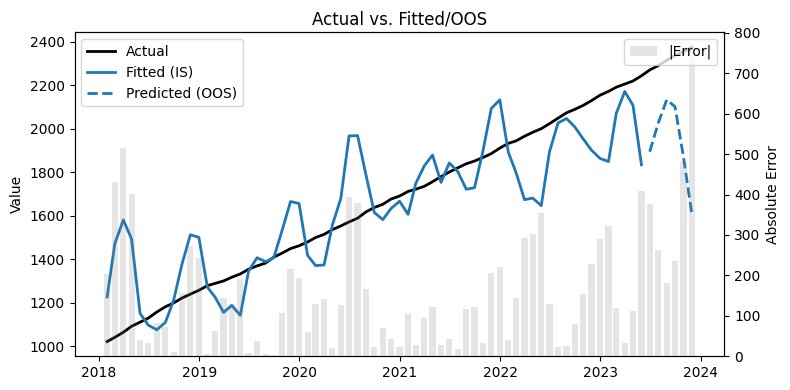


=== Model Testing ===
--- Fit Measures ---
R²        0.705074
Adj R²    0.685413

--- IS Error Measures ---
ME      515.865766
MAE     143.701378
RMSE    190.572818

--- OOS Error Measures ---
ME      762.857989
MAE     383.648044
RMSE    430.941118

--- In-Sample R² ---
R²    0.705074

--- Common Driver Significance ---
           P-value  Passed
NGDP  5.406589e-15    True

--- Group Driver F-Test M:2'3'4 ---
              F-statistic   P-value  Passed
Joint F Test     4.796177  0.004632    True

--- Multicollinearity ---
               VIF
Variable          
M:2       1.081146
M:3       1.130940
M:4       1.090843
NGDP      1.186288

--- Residual Stationarity ---
       Statistic   P-value  Passed
Test                              
ADF     0.120809  0.967453   False
PP     -2.150006  0.224888   False
KPSS    0.719693  0.011755   False
ZA           NaN       NaN   False
DFGLS   1.199149  0.945881   False
RUR     1.364382  0.900000    True

--- Residual Normality ---
      Statistic  

In [22]:
cm1.show_report(show_tests=True)

In [23]:
cm_config = {
    'model_id': 'cm1',
    'target': 'VR_balance',
    'model_cls': QT.OLS
}
cm2 = QT.CM(**cm_config)

m_dum = QT.DumVar('M')
indep_vars = [m_dum, 'NGDP']
cm2.build(indep_vars, data_manager=dm, outlier_idx=['2018-04-30', '2018-05-31'])

=== In-Sample Performance ===
      r2   adj_r2         me        mae      rmse
0.743924 0.682465 515.181991 134.877989 173.64281

=== Model Parameters ===
Variable        Coef Pvalue       VIF       Std
   const -1.0678e+05  0.000 140101.80 9176.3579
     M:2    169.4331  0.017      1.83   68.4266
     M:3    276.3038  0.013      1.87  107.2667
     M:4    305.4547  0.002      1.71   92.9699
     M:5    114.5325  0.290      1.69  107.0315
     M:6   -109.6318  0.288      1.69  102.1861
     M:7   -115.9237  0.230      1.70   95.3646
     M:8    -47.8078  0.531      1.69   75.8451
     M:9    -12.4820  0.851      1.69   66.1393
    M:10    -71.1605  0.350      1.70   75.3790
    M:11   -143.1359  0.112      1.73   88.4779
    M:12   -127.0523  0.114      1.73   78.9336
    NGDP   1048.8962  0.000      1.24   88.8590


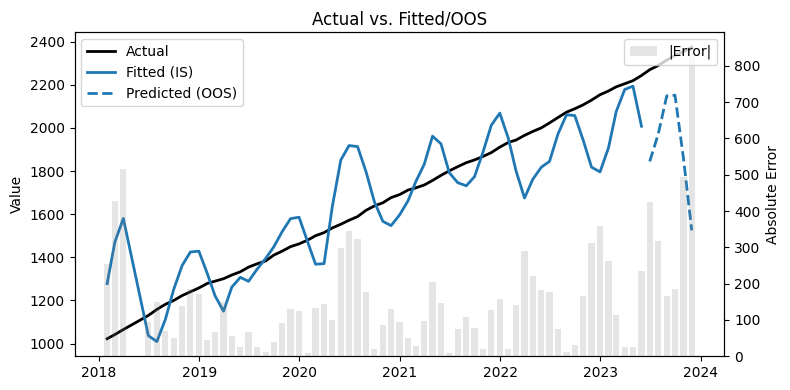


=== Model Testing ===
--- Fit Measures ---
R²        0.743924
Adj R²    0.682465

--- IS Error Measures ---
ME      515.181991
MAE     134.877989
RMSE    173.642810

--- OOS Error Measures ---
ME      849.874941
MAE     406.410697
RMSE    467.376974

--- In-Sample R² ---
R²    0.743924

--- Common Driver Significance ---
           P-value  Passed
NGDP  4.543253e-16    True

--- Group Driver F-Test M:2'3'4'5'6'7'8'9'10'11'12 ---
              F-statistic  P-value  Passed
Joint F Test     3.174883  0.00251    True

--- Multicollinearity ---
               VIF
Variable          
M:2       1.833992
M:3       1.871102
M:4       1.705485
M:5       1.691841
M:6       1.694321
M:7       1.699072
M:8       1.691778
M:9       1.690066
M:10      1.702008
M:11      1.729938
M:12      1.731032
NGDP      1.244271

--- Residual Stationarity ---
       Statistic   P-value  Passed
Test                              
ADF    -0.066617  0.952664   False
PP     -2.754240  0.065113   False
KPSS    0.653880

In [24]:
cm2.show_report(show_tests=True)

In [25]:
# cm2.model_in.testset.tests[-1].

In [26]:
# cm2.tests_in.test_result

### Segment

In [27]:
seg_config = {
    'segment_id': 'VR',
    'target': 'VR_balance',
    'data_manager': dm,
    'model_cls': QT.OLS
}

seg1 = QT.Segment(**seg_config)

In [28]:
vars_list = ['VR_price', 'Fixed_price', 'NGDP', 'CPI', 'PSR', 'PDI']
tsfm_specs_map = dm.build_tsfm_specs(vars_list, max_lag=1, max_periods=2)

e:\OneDrive\Git\Project_LEGO\TECHNIC\data.py:308: UserWarning: No type mapping for variables: ['VR_price', 'Fixed_price', 'PSR'], using raw-only
  warnings.warn(


In [29]:
tsfm_specs_map

{'VR_price': ['VR_price'],
 'Fixed_price': ['Fixed_price'],
 'NGDP': [TSFM:NGDP_LV,
  TSFM:NGDP_LV_L1,
  TSFM:NGDP_GR,
  TSFM:NGDP_GR_L1,
  TSFM:NGDP_GR2,
  TSFM:NGDP_GR2_L1],
 'CPI': [TSFM:CPI_LV,
  TSFM:CPI_LV_L1,
  TSFM:CPI_DF,
  TSFM:CPI_DF_L1,
  TSFM:CPI_DF2,
  TSFM:CPI_DF2_L1,
  TSFM:CPI_GR,
  TSFM:CPI_GR_L1,
  TSFM:CPI_GR2,
  TSFM:CPI_GR2_L1],
 'PSR': ['PSR'],
 'PDI': [TSFM:PDI_LV,
  TSFM:PDI_LV_L1,
  TSFM:PDI_DF,
  TSFM:PDI_DF_L1,
  TSFM:PDI_DF2,
  TSFM:PDI_DF2_L1,
  TSFM:PDI_GR,
  TSFM:PDI_GR_L1,
  TSFM:PDI_GR2,
  TSFM:PDI_GR2_L1]}

In [30]:
vars_list = ['VR_price', 'Fixed_price', 'NGDP', 'CPI', 'PSR', 'PDI']
tsfm_df_map = dm.build_search_vars(vars_list, max_lag=1, max_periods=2)
tsfm_df_map['PDI'] 

,PDI_LV,PDI_LV_L1,PDI_DF,PDI_DF_L1,PDI_DF2,PDI_DF2_L1,PDI_GR,PDI_GR_L1,PDI_GR2,PDI_GR2_L1
2000-03-31,8047.460000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-04-30,8036.334431,8047.460000,-11.125569,NaN,NaN,NaN,-0.001382,NaN,NaN,NaN
2000-05-31,8037.305959,8036.334431,0.971528,-11.125569,-10.154041,NaN,0.000121,-0.001382,-0.001262,NaN
2000-06-30,8044.020000,8037.305959,6.714041,0.971528,7.685569,-10.154041,0.000835,0.000121,0.000956,-0.001262
2000-07-31,8050.351074,8044.020000,6.331074,6.714041,13.045115,7.685569,0.000787,0.000835,0.001623,0.000956
...,...,...,...,...,...,...,...,...,...,...
2030-08-31,8335.923233,8349.590293,-13.667060,-5.699707,-19.366767,-0.488479,-0.001637,-0.000682,-0.002318,-0.000058
2030-09-30,8319.090000,8335.923233,-16.833233,-13.667060,-30.500293,-19.366767,-0.002019,-0.001637,-0.003653,-0.002318
2030-10-31,8302.079944,8319.090000,-17.010056,-16.833233,-33.843290,-30.500293,-0.002045,-0.002019,-0.004060,-0.003653
2030-11-30,8289.926172,8302.079944,-12.153771,-17.010056,-29.163828,-33.843290,-0.001464,-0.002045,-0.003506,-0.004060


In [31]:
# Explore Vars
# vars_list = ['VR_price', 'Fixed_price', 'NGDP', 'CPI', 'PSR', 'PDI']
# seg1.explore_vars(vars_list, plot_type='scatter')

In [32]:
# forced_in = ['VR_price', QT.DumVar('M', categories=[2,3,4])]
# desired_pool = [('PDI', 'PSR'), 'NGDP', 'UNRATE', 'CPI']
# seg1.search_cms(desired_pool=desired_pool, forced_in=None)

In [33]:
# seg1.show_report(show_params=True, show_tests=True)

In [34]:
# seg1.cms['cm2'].show_report()

In [35]:
# CM1
indep_vars = ['NGDP']
seg1.build_cm('cm1', indep_vars)

OLS:VR_balance~C+NGDP

In [36]:
dm.model_mev['NGDP']

2000-03-31    100.160000
2000-04-30     99.896506
2000-05-31     99.768751
2000-06-30     99.740000
2000-07-31     99.761353
                 ...    
2030-08-31    104.723199
2030-09-30    104.760000
2030-10-31    104.821508
2030-11-30    104.905647
2030-12-31    105.020000
Freq: M, Name: NGDP, Length: 370, dtype: float64

In [37]:
# CM2
m_dum = QT.DumVar('M')
indep_vars = [m_dum, 'NGDP']
seg1.build_cm('cm2', indep_vars)

OLS:VR_balance~C+M:2+M:3+M:4+M:5+M:6+M:7+M:8+M:9+M:10+M:11+M:12+NGDP

In [38]:
from TECHNIC import GR2
# CM3
m_dum = QT.DumVar('M', categories=[2,3,4,5,6,7])
tsfm_var = [TSFM('PSR', 'GR2')]

indep_vars = [m_dum, 'NGDP', tsfm_var]
seg1.build_cm('cm3', indep_vars)

OLS:VR_balance~C+M:2+M:3+M:4+M:5+M:6+M:7+NGDP+PSR_GR2

In [39]:
# seg1.cms['cm3'].model_in.testset.tests[3].test_result

In [40]:
# from TECHNIC import GR2
# # CM4
# m_dum = QT.DumVar('M', mode='group', categories=[(2,3,4),5,6,7])
# tsfm_var = [TSFM('PSR', 'GR2')]

# indep_vars = [m_dum, 'NGDP', tsfm_var]
# seg1.build_cm('cm4', indep_vars)

=== Candidate Models to Report ===
- cm1: OLS:VR_balance~C+NGDP
- cm2: OLS:VR_balance~C+M:2+M:3+M:4+M:5+M:6+M:7+M:8+M:9+M:10+M:11+M:12+NGDP
- cm3: OLS:VR_balance~C+M:2+M:3+M:4+M:5+M:6+M:7+NGDP+PSR_GR2


=== In-Sample Performance ===
             r2    adj_r2          me         mae        rmse
Model                                                        
cm1    0.596697  0.590295  509.892567  183.046368  222.854010
cm2    0.735107  0.673978  513.744124  140.972045  180.609330
cm3    0.744760  0.708297  427.993025  141.614588  177.287869

=== Out-of-Sample Performance ===
               me         mae        rmse
Model                                    
cm1    694.567432  366.114671  403.420456
cm2    854.166339  398.200927  463.561599
cm3    941.278979  401.257529  491.479559

=== Performance Plot ===


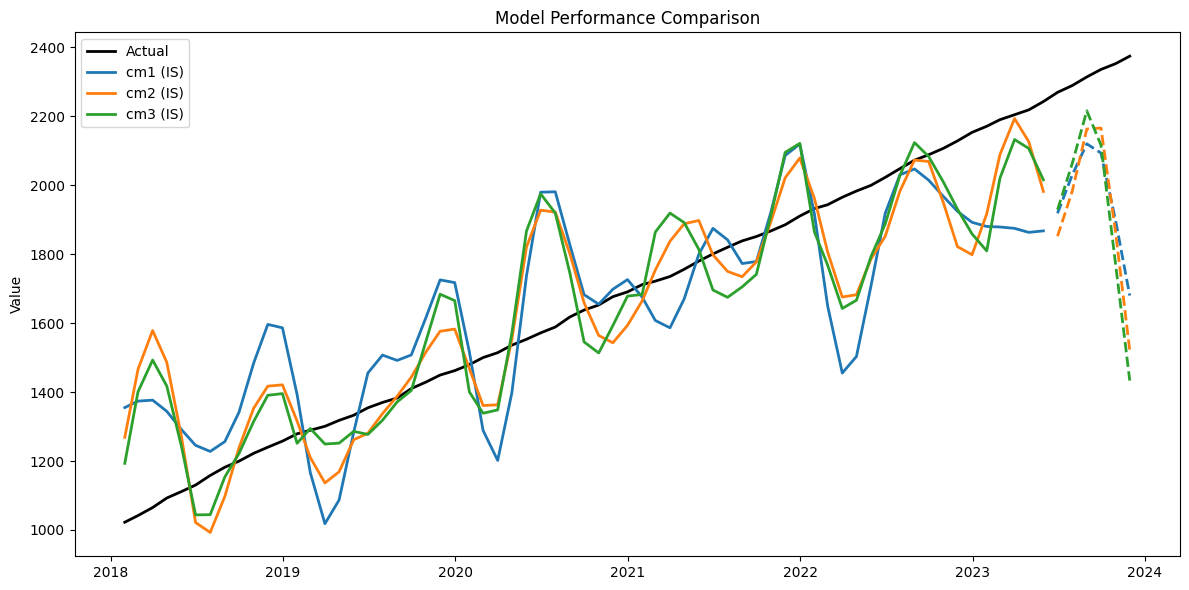


=== Model: cm1 — Parameters ===
  Variable          Coef        Pvalue            VIF           Std
0    const -88719.982410  7.627200e-08  111107.892197  14581.856844
1     NGDP    874.300386  4.914405e-08       1.000000    141.108253

=== Model: cm2 — Parameters ===
   Variable           Coef        Pvalue            VIF           Std
0     const -109858.856406  6.644836e-15  138984.116588  10165.003440
1       M:2     173.809585  1.165348e-02       1.838987     66.470918
2       M:3     283.246696  8.025759e-03       1.874783    102.733422
3       M:4     230.754453  2.686591e-02       1.845512    101.297227
4       M:5      80.732964  4.240230e-01       1.815480    100.188765
5       M:6    -112.079711  2.691142e-01       1.698565    100.336809
6       M:7    -119.145261  2.192612e-01       1.703145     95.814548
7       M:8     -49.716763  5.097136e-01       1.696113     74.890589
8       M:9     -13.918419  8.266694e-01       1.694462     63.242116
9      M:10     -74.778220  3.

In [41]:
seg1.show_report(show_params=True, show_tests=True)

In [42]:
vr_95 = seg1.dm.internal_data['VR_balance'].quantile(0.90)
vr_95

2218.766721015874

In [43]:
from TECHNIC import CondVar, BO
#cm4 with CondVars
mth_var = [f'M{i}' for i in range(2,5)]
tsfm_var = [TSFM('PSR', GR2)]
cond_var = CondVar('VR_price', 'VR_balance', BO, {'threshold': vr_95})

indep_vars = [mth_var, 'NGDP', tsfm_var, cond_var]
seg1.build_cm('cm4', indep_vars)

OLS:VR_balance~C+M2+M3+M4+NGDP+PSR_GR2+VR_price_BO

In [44]:
(seg1.cms['cm4'].model_full.y > vr_95).loc[lambda x: x==1]

2023-05-31    True
2023-06-30    True
2023-07-31    True
2023-08-31    True
2023-09-30    True
2023-10-31    True
2023-11-30    True
Freq: M, Name: VR_balance, dtype: bool

In [45]:
tf = (seg1.cms['cm4'].model_full.X.VR_price_BO - seg1.dm.internal_data.VR_price) != 0
tf.loc[lambda x: x==1]

2023-06-30    True
2023-07-31    True
2023-08-31    True
2023-09-30    True
2023-10-31    True
2023-11-30    True
Freq: M, dtype: bool

In [46]:
cm = seg1.cms['cm4']
cm.model_in.testset.filter_pass(fast_filter=False)

(False, ['Common Driver Significance', 'Residual Stationarity'])

In [47]:
cm.model_in.testset.print_test_info()

Active Tests:
- In-Sample R² | category: fit | filter_mode: moderate | desc: Require R² ≥ 0.4.
- Common Driver Significance | category: performance | filter_mode: moderate | desc: Require p-value < 0.10 for all coefficients.
- Multicollinearity | category: base | filter_mode: moderate | desc: Threshold = 10
- Residual Stationarity | category: assumption | filter_mode: moderate | desc: At least half of stationarity tests must pass.
- Residual Normality | category: assumption | filter_mode: moderate | desc: At least half of normality tests must pass.
- Y–X Cointegration | category: assumption | filter_mode: moderate | desc: Require Engle–Granger p-value < 0.10

Inactive Tests:
- Fit Measures
- IS Error Measures
- OOS Error Measures
- Residual Autocorrelation
- Residual Heteroscedasticity
- Y Stationarity

Note: These tests are included but not turned on. Set `filter_on=True` on a test to include it in filter_pass results.


### Test

In [48]:
seg1.cms['cm4'].model_in.testset.filter_pass(fast_filter=False)

(False, ['Common Driver Significance', 'Residual Stationarity'])

## Search

In [49]:
mdlsrch_config = {
    'dm': dm,
    'target': 'VR_balance',
    'model_cls': QT.OLS
}

srch = QT.ModelSearch(**mdlsrch_config)

In [50]:
dm.model_mev.head()

nan,NGDP,PSR,PDI,UNRATE,CPI,M,Q,NGDP-Price,PDI-FixBal
2000-03-31,100.160000,10032.570000,8047.460000,3.640000,3.080000,3,1,NaN,NaN
2000-04-30,99.896506,10049.097386,8036.334431,4.098958,2.067059,4,2,NaN,NaN
2000-05-31,99.768751,10031.340067,8037.305959,4.332339,2.532845,5,2,NaN,NaN
2000-06-30,99.740000,9996.180000,8044.020000,4.420000,3.960000,6,2,NaN,NaN
2000-07-31,99.761353,9957.712737,8050.351074,4.466939,5.934583,7,3,NaN,NaN


In [51]:
forced_in = [QT.DumVar('M', categories=[2,3,4])]
desired_pool = [('PDI', 'PSR'), ['NGDP', QT.DumVar('M', categories=[2,3,4])], {'UNRATE', 'CPI', 'VR_price',}]

srch.build_spec_combos(forced_in=None, desired_pool=desired_pool, max_var_num=4, max_lag=2, max_periods=2)
srch.all_specs

e:\OneDrive\Git\Project_LEGO\TECHNIC\data.py:308: UserWarning: No type mapping for variables: ['UNRATE', 'VR_price'], using raw-only
  warnings.warn(


[[('PDI', 'PSR')],
 [['NGDP', DumVar:M:2'3'4]],
 ['UNRATE'],
 ['VR_price'],
 [TSFM:CPI_LV],
 [TSFM:CPI_LV_L1],
 [TSFM:CPI_LV_L2],
 [TSFM:CPI_DF],
 [TSFM:CPI_DF_L1],
 [TSFM:CPI_DF_L2],
 [TSFM:CPI_DF2],
 [TSFM:CPI_DF2_L1],
 [TSFM:CPI_DF2_L2],
 [TSFM:CPI_GR],
 [TSFM:CPI_GR_L1],
 [TSFM:CPI_GR_L2],
 [TSFM:CPI_GR2],
 [TSFM:CPI_GR2_L1],
 [TSFM:CPI_GR2_L2],
 [('PDI', 'PSR'), ['NGDP', DumVar:M:2'3'4]],
 [('PDI', 'PSR'), 'UNRATE'],
 [('PDI', 'PSR'), 'VR_price'],
 [('PDI', 'PSR'), TSFM:CPI_LV],
 [('PDI', 'PSR'), TSFM:CPI_LV_L1],
 [('PDI', 'PSR'), TSFM:CPI_LV_L2],
 [('PDI', 'PSR'), TSFM:CPI_DF],
 [('PDI', 'PSR'), TSFM:CPI_DF_L1],
 [('PDI', 'PSR'), TSFM:CPI_DF_L2],
 [('PDI', 'PSR'), TSFM:CPI_DF2],
 [('PDI', 'PSR'), TSFM:CPI_DF2_L1],
 [('PDI', 'PSR'), TSFM:CPI_DF2_L2],
 [('PDI', 'PSR'), TSFM:CPI_GR],
 [('PDI', 'PSR'), TSFM:CPI_GR_L1],
 [('PDI', 'PSR'), TSFM:CPI_GR_L2],
 [('PDI', 'PSR'), TSFM:CPI_GR2],
 [('PDI', 'PSR'), TSFM:CPI_GR2_L1],
 [('PDI', 'PSR'), TSFM:CPI_GR2_L2],
 [['NGDP', DumVar:M:2'3'4],

In [52]:
passed_cms, failed_info, error_log = srch.filter_specs()

Filtering Specs: 100%|██████████| 71/71 [00:05<00:00, 13.28it/s, estimated_finish=2025-06-02 15:02:15]


In [53]:
error_log

[]

In [54]:
failed_info

[([('PDI', 'PSR')], ['Residual Stationarity']),
 ([['NGDP', DumVar:M:2'3'4]], ['Residual Stationarity']),
 (['UNRATE'], ['In-Sample R²']),
 (['VR_price'], ['In-Sample R²']),
 ([TSFM:CPI_LV], ['In-Sample R²']),
 ([TSFM:CPI_LV_L1], ['In-Sample R²']),
 ([TSFM:CPI_LV_L2], ['In-Sample R²']),
 ([TSFM:CPI_DF], ['In-Sample R²']),
 ([TSFM:CPI_DF_L1], ['In-Sample R²']),
 ([TSFM:CPI_DF_L2], ['In-Sample R²']),
 ([TSFM:CPI_DF2], ['In-Sample R²']),
 ([TSFM:CPI_DF2_L1], ['In-Sample R²']),
 ([TSFM:CPI_DF2_L2], ['In-Sample R²']),
 ([TSFM:CPI_GR], ['In-Sample R²']),
 ([TSFM:CPI_GR_L1], ['In-Sample R²']),
 ([TSFM:CPI_GR_L2], ['In-Sample R²']),
 ([TSFM:CPI_GR2], ['In-Sample R²']),
 ([TSFM:CPI_GR2_L1], ['In-Sample R²']),
 ([TSFM:CPI_GR2_L2], ['In-Sample R²']),
 ([('PDI', 'PSR'), ['NGDP', DumVar:M:2'3'4]], ['Residual Stationarity']),
 ([('PDI', 'PSR'), 'UNRATE'], ['Common Driver Significance']),
 ([('PDI', 'PSR'), 'VR_price'], ['Common Driver Significance']),
 ([('PDI', 'PSR'), TSFM:CPI_LV], ['Common Driver

In [55]:
def test_update_func(mdl):

    update_map = {
    'Residual Stationarity': {'filter_on': False}
    }

    return update_map

passed_cms, failed_info, error_log = srch.filter_specs(test_update_func=test_update_func)

Filtering Specs: 100%|██████████| 71/71 [00:04<00:00, 14.95it/s, estimated_finish=2025-06-02 15:02:20]


In [56]:
passed_cms

[OLS:VR_balance~C+NGDP+M:2+M:3+M:4+CPI_DF,
 OLS:VR_balance~C+NGDP+M:2+M:3+M:4+CPI_DF_L1,
 OLS:VR_balance~C+NGDP+M:2+M:3+M:4+CPI_DF2,
 OLS:VR_balance~C+NGDP+M:2+M:3+M:4+CPI_GR,
 OLS:VR_balance~C+NGDP+M:2+M:3+M:4+CPI_GR_L1,
 OLS:VR_balance~C+NGDP+M:2+M:3+M:4+CPI_GR2]

In [57]:
error_log

[]

In [58]:
print(seg1.cms['cm3'].model_in.testset.filter_pass(fast_filter=False))


def test_update_func(mdl):

    update_map = {
    'Residual Stationarity': {'filter_on': False}
    }

    return update_map

seg1.cms['cm3'].model_in.load_testset(test_update_func=test_update_func)
print(seg1.cms['cm3'].model_in.testset.filter_pass(fast_filter=False))

(False, ['Common Driver Significance'])
(False, ['Common Driver Significance'])


In [59]:
def test_update_func(mdl):

    update_map = {
    'Residual Stationarity': {'filter_on': False},
    'In-Sample R²': {'thresholds':{'strict': 0.8, 'moderate': 0.7}}
    }

    return update_map


forced_in = []
desired_pool = [['PDI', 'PSR'], 'NGDP', {'UNRATE', 'CPI'}, 'VR_price', QT.DumVar('M', categories=[2,3,4])]
seg1.search_cms(desired_pool=desired_pool, forced_in=forced_in, test_update_func=test_update_func, outlier_idx=["2018-04-30", "2018-05-31"])

e:\OneDrive\Git\Project_LEGO\TECHNIC\data.py:308: UserWarning: No type mapping for variables: ['UNRATE', 'VR_price'], using raw-only
  warnings.warn(


=== ModelSearch Configuration ===
Target          : VR_balance
Model class     : OLS
Desired pool    : [['PDI', 'PSR'], 'NGDP', {'UNRATE', 'CPI'}, 'VR_price', DumVar:M:2'3'4]
Forced in       : []
Sample          : in
Max var num     : 5
Max lag         : 3
Max periods     : 3
Top N           : 10
Rank weights    : (1, 1, 1)
Test update func: <function test_update_func at 0x000001809B1B53A0>

Built 4079 spec combinations.

--- Example TestSet Info ---
Active Tests:
- In-Sample R² | category: fit | filter_mode: moderate | desc: Require R² ≥ 0.7.
- Common Driver Significance | category: performance | filter_mode: moderate | desc: Require p-value < 0.10 for all coefficients.
- Multicollinearity | category: base | filter_mode: moderate | desc: Threshold = 10
- Residual Normality | category: assumption | filter_mode: moderate | desc: At least half of normality tests must pass.
- Y–X Cointegration | category: assumption | filter_mode: moderate | desc: Require Engle–Granger p-value < 0.10

Ina

Filtering Specs: 100%|██████████| 4079/4079 [04:34<00:00, 14.87it/s, estimated_finish=2025-06-02 15:06:55]

Passed 2 combos; Failed 4077 combos; 0 errors.

=== Updated Ranked Results ===
model_id  fit_score  is_err_score  oos_err_score  composite_score
     cm1        1.0           1.0            0.0         0.666667
     cm2        0.0           0.0            1.0         0.333333

=== Top 10 Model Formulas ===
cm1: OLS:VR_balance~C+NGDP_LV+CPI_GR3+M:2+M:3+M:4
cm2: OLS:VR_balance~C+NGDP_LV+CPI_GR_L1+M:2+M:3+M:4


In [60]:
seg1.searcher.analyze_failures()


=== Failed Spec Combinations Analysis ===
Total failed spec combos: 4077

1) Failure counts by test:
                 Test Name  Failure Count
              In-Sample R²           3530
Common Driver Significance            533
         Y–X Cointegration             13
        Residual Normality              1


2) Top 5 most frequent failed tests and their common spec elements:

  Test: In-Sample R²
    Number of combos that failed this test: 3530
    Top 3 spec elements contributing to this failure:
      • VR_price  (appeared in 1765 combos)
      • DumVar:M:2'3'4  (appeared in 1731 combos)
      • ['PDI', 'PSR']  (appeared in 1560 combos)

  Test: Common Driver Significance
    Number of combos that failed this test: 533
    Top 3 spec elements contributing to this failure:
      • ['PDI', 'PSR']  (appeared in 478 combos)
      • DumVar:M:2'3'4  (appeared in 293 combos)
      • VR_price  (appeared in 275 combos)

  Test: Y–X Cointegration
    Number of combos that failed this test:

=== Candidate Models to Report ===
- cm1: OLS:VR_balance~C+NGDP
- cm2: OLS:VR_balance~C+M:2+M:3+M:4+M:5+M:6+M:7+M:8+M:9+M:10+M:11+M:12+NGDP
- cm3: OLS:VR_balance~C+M:2+M:3+M:4+M:5+M:6+M:7+NGDP+PSR_GR2
- cm4: OLS:VR_balance~C+M2+M3+M4+NGDP+PSR_GR2+VR_price_BO
- cm1_2: OLS:VR_balance~C+NGDP_LV+CPI_GR3+M:2+M:3+M:4
- cm2_2: OLS:VR_balance~C+NGDP_LV+CPI_GR_L1+M:2+M:3+M:4


=== In-Sample Performance ===
             r2    adj_r2          me         mae        rmse
Model                                                        
cm1    0.596697  0.590295  509.892567  183.046368  222.854010
cm2    0.735107  0.673978  513.744124  140.972045  180.609330
cm3    0.744760  0.708297  427.993025  141.614588  177.287869
cm4    0.729727  0.701767  434.283901  139.043060  182.434269
cm1_2  0.724594  0.700435  470.257844  140.363164  180.077373
cm2_2  0.723754  0.699522  475.424552  140.415340  180.351688

=== Out-of-Sample Performance ===
               me         mae        rmse
Model                     

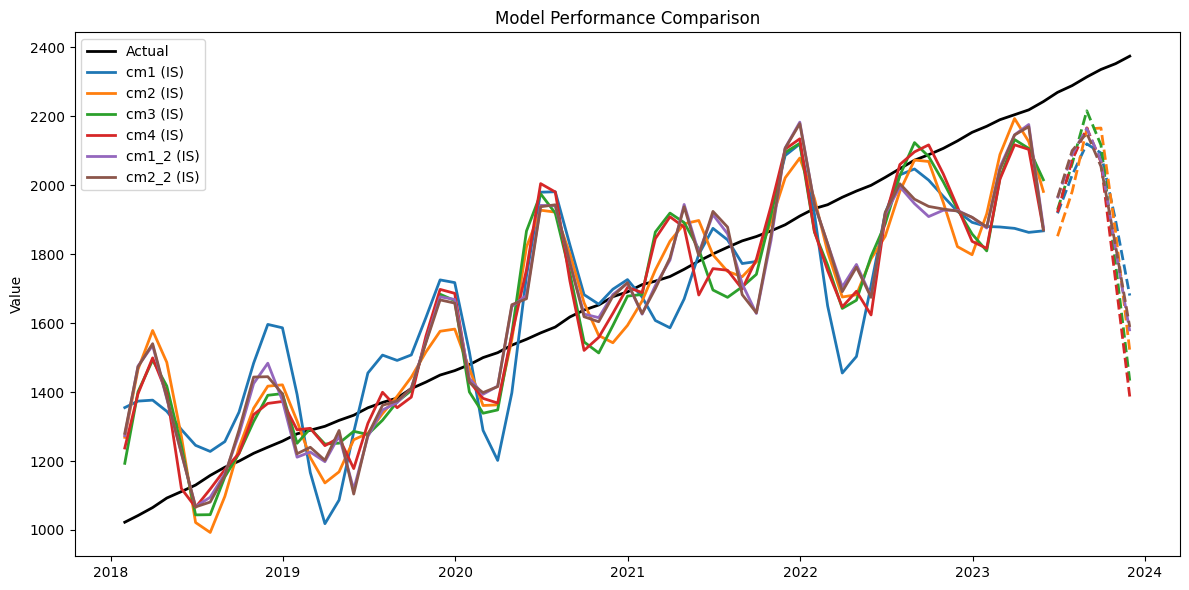


=== Model: cm1 — Testing Metrics ===

--- Fit Measures ---
R²        0.596697
Adj R²    0.590295

--- IS Error Measures ---
ME      509.892567
MAE     183.046368
RMSE    222.854010

--- OOS Error Measures ---
ME      694.567432
MAE     366.114671
RMSE    403.420456

--- In-Sample R² ---
R²    0.596697

--- Common Driver Significance ---
           P-value  Passed
NGDP  4.914405e-08    True

--- Multicollinearity ---
          VIF
Variable     
NGDP      1.0

--- Residual Stationarity ---
       Statistic   P-value  Passed
Test                              
ADF    -0.159411  0.943190   False
PP     -1.697299  0.432504   False
KPSS    0.876946  0.010000   False
ZA           NaN       NaN   False
DFGLS   1.166792  0.942773   False
RUR     1.488417  0.900000    True

--- Residual Normality ---
      Statistic   P-value  Passed
Test                             
JB     1.784796  0.409672    True
SW     0.979800  0.366263    True
KS     0.065063  0.929257    True
CM     0.040165  0.933652   

In [61]:
seg1.show_report(show_tests=True)

In [62]:
seg1.searcher.top_cms[0].testset_in.tests[3].thresholds

{'strict': 0.8, 'moderate': 0.7}

### Scenario

In [63]:
# # Create a Scenario object
# mth_var = [f'M{i}' for i in range(2,5)]
# tsfm_var = [TSFM('PSR', 'GR2')]
# cond_var = CondVar('VR_price', 'VR_balance', BO, {'threshold': vr_95})

# scen_config = {
#     'dm': dm,
#     'model': cm.model_in,
#     'specs': [mth_var, 'NGDP', tsfm_var, cond_var],
#     'P0': '2023-08-31'
# }
# scen = QT.Scenario(**scen_config)
# y_scens = scen.y_scens

In [64]:
# y_scens['fake_scens']['base'].dropna()

In [65]:
# y_scens['fake_scens']['adv'].dropna()